In [13]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
img = cv2.imread("icon1.png",0)
from math import sqrt,exp


(<AxesSubplot:title={'center':' High Pass '}>,
 Text(0.5, 1.0, ' High Pass '))

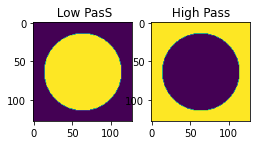

In [14]:
real_image = np.fft.fft2(img)
centershift = np.fft.fftshift(real_image)

def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

# Using numpy for creating zeros array for high pass filter

def funlowPass(given_dist,imgShape):
    base = np.zeros(imgShape[:2])
    row= imgShape[0]
    col= imgShape[1]
    center = (row/2,col/2)
    for x in range(col):
        for y in range(row):
            if distance((y,x),center) < given_dist:
                base[y,x] = 1
    return base
# Using numpy for creating ones array for high pass filter
def funhighPass(given_dist,imgShape):
    base = np.ones(imgShape[:2])
    row= imgShape[0]
    col= imgShape[1]
    center = (row/2,col/2)
    for x in range(col):
        for y in range(row):
            if distance((y,x),center) < given_dist:
                base[y,x] = 0
    return base
LowPass = funlowPass(50,img.shape)
plt.subplot(131), plt.imshow(LowPass), plt.title(" Low PasS")

HighPass = funhighPass(50,img.shape)
plt.subplot(132), plt.imshow(HighPass), plt.title(" High Pass ")






(<AxesSubplot:title={'center':' Low Pass'}>,
 Text(0.5, 1.0, ' Low Pass'))

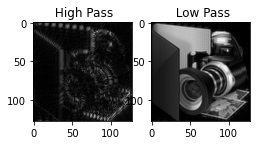

In [15]:

HighPassCenter = centershift * funhighPass(50,img.shape)
HighPass=np.fft.ifftshift(HighPassCenter)
inverseH=np.fft.ifft2(HighPass)
plt.subplot(131), plt.imshow(np.abs(inverseH), "gray"), plt.title(" High Pass")

LowPassCenter = centershift * funlowPass(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverseL= np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverseL), "gray"), plt.title(" Low Pass")
